In [105]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
import glob
import math
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [222]:
full_df = pd.DataFrame()
for file_name in glob.glob("data/*.csv"):
    stock_name = os.path.basename(file_name)[:-4]
    x = pd.read_csv(file_name, low_memory=False)
    x = x.set_index("Date")
    x["Day % Change"] = 100 * (x["Close"] - x["Open"]) / x["Open"]
    open_perc_changes = [np.nan]
    for i in range(1, len(x)):
        day_open = x.iloc[i]["Open"]
        prev_day_close = x.iloc[i - 1]["Close"]
        open_perc_changes.append(100 * (day_open - prev_day_close) / prev_day_close)
    x["Open % Change"] = open_perc_changes
    x = x.drop("Adj Close", axis = 1)
    for name, values in x.iteritems():
        x.rename(columns = {name : stock_name + " " + name}, inplace = True)
    if len(full_df) > 0:
        full_df = full_df.merge(x, left_index = True, right_index = True)
    else:
        full_df = x
tickers = ["AAPL", "MSFT", "ADBE", "ORCL", "SPY"]
perc_cols = []
for ticker in tickers:
    perc_cols.append(ticker + " Day % Change")
    perc_cols.append(ticker + " Open % Change")
full_df = full_df[perc_cols]
for ticker in tickers:
    ticker_prev_day_change = [np.nan]
    for i in range(1, len(x)):
        ticker_prev_day_change.append(full_df.iloc[i - 1][ticker + " Day % Change"])
    full_df[ticker + " Prev Day Change"] = ticker_prev_day_change
full_df = full_df[1:]

C:\Users\ryanc\AppData\Local\Temp\ipykernel_15480\689966998.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in x.iteritems():
C:\Users\ryanc\AppData\Local\Temp\ipykernel_15480\689966998.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in x.iteritems():
C:\Users\ryanc\AppData\Local\Temp\ipykernel_15480\689966998.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in x.iteritems():
C:\Users\ryanc\AppData\Local\Temp\ipykernel_15480\689966998.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in x.iteritems():
C:\Users\ryanc\AppData\Local\Temp\ipykernel_15480\689966998.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, value

In [223]:
full_df.head()

,AAPL Day % Change,AAPL Open % Change,MSFT Day % Change,MSFT Open % Change,ADBE Day % Change,ADBE Open % Change,ORCL Day % Change,ORCL Open % Change,SPY Day % Change,SPY Open % Change,AAPL Prev Day Change,MSFT Prev Day Change,ADBE Prev Day Change,ORCL Prev Day Change,SPY Prev Day Change
Date,,,,,,,,,,,,,,,
1993-02-01,3.375500,-0.420141,1.449257,-0.288999,5.454545,-0.602410,3.448177,0.384688,0.639659,0.071124,-1.244735,-1.142857,-1.775148,-0.763379,-0.071073
1993-02-02,-0.823177,-0.816274,1.859790,-0.142848,3.125018,1.149425,-1.487027,-0.370320,0.282686,-0.070621,3.375500,1.449257,5.454545,3.448177,0.639659
1993-02-03,-1.639423,1.244920,-1.256974,0.561798,-5.464481,0.826429,0.375889,0.377430,0.914849,0.140944,-0.823177,1.859790,3.125018,-1.487027,0.282686
1993-02-04,-0.833280,0.000000,-3.133921,-0.707204,0.000000,1.156069,-2.247128,0.000000,0.069493,0.348675,-1.639423,-1.256974,-5.464481,0.375889,0.914849
1993-02-05,-3.375500,-0.420141,5.014729,-0.294099,-4.857125,0.000000,-1.158393,-0.766303,0.000000,-0.069444,-0.833280,-3.133921,0.000000,-2.247128,0.069493


In [219]:
full_df.columns

Index(['AAPL Day % Change', 'AAPL Open % Change', 'MSFT Day % Change',
       'MSFT Open % Change', 'ADBE Day % Change', 'ADBE Open % Change',
       'ORCL Day % Change', 'ORCL Open % Change', 'SPY Day % Change',
       'SPY Open % Change', 'AAPL Prev Day Change', 'MSFT Prev Day Change',
       'ADBE Prev Day Change', 'ORCL Prev Day Change', 'SPY Prev Day Change'],
      dtype='object')

In [66]:
df = full_df[["MSFT Day % Change","AAPL Open % Change","ADBE Open % Change", "SPY Open % Change", "ORCL Open % Change"]]
X = df[cols[1:]]
y = df[cols[0]]
model1 = sm.OLS(y, X).fit()

In [67]:
df.corr()

,MSFT Day % Change,AAPL Open % Change,ADBE Open % Change,SPY Open % Change,ORCL Open % Change
MSFT Day % Change,1.000000,0.023326,0.020937,0.031387,0.019737
AAPL Open % Change,0.023326,1.000000,0.296220,0.476300,0.303770
ADBE Open % Change,0.020937,0.296220,1.000000,0.500118,0.357527
SPY Open % Change,0.031387,0.476300,0.500118,1.000000,0.528250
ORCL Open % Change,0.019737,0.303770,0.357527,0.528250,1.000000


In [68]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      MSFT Day % Change   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              2.313
Date:                Thu, 17 Aug 2023   Prob (F-statistic):                      0.0552
Time:                        12:32:43   Log-Likelihood:                         -14612.
No. Observations:                7683   AIC:                                  2.923e+04
Df Residuals:                    7679   BIC:                                  2.926e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AAPL Open % Change     0.0112      0.013      0.870      0.384      -0.014       0.036
ADBE Open % Change     0.0060      0.014      0.429      0.668      -0.021       0.033
SPY Open % Change      0.0539      0.037      1.441      0.150      -0.019       0.127
ORCL Open % Change     0.0036      0.014      0.249      0.803      -0.025       0.032
==============================================================================
Omnibus:                      627.704   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3096.748
Skew:                           0.235   Prob(JB):                         0.00
Kurtosis:                       6.075   Cond. No.                         4.30
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Coefficients not significant
With a significance level of 1%, the regression model using all dates and a complete training set, using open changes from competitor stocks and market ETF, has no significant predictor on MSFT day changes.


In [69]:
df_modern = df[df.index > "2010-01-01"]
df_modern.corr()

,MSFT Day % Change,AAPL Open % Change,ADBE Open % Change,SPY Open % Change,ORCL Open % Change
MSFT Day % Change,1.000000,0.038709,0.045977,0.060099,0.056029
AAPL Open % Change,0.038709,1.000000,0.492565,0.683150,0.427040
ADBE Open % Change,0.045977,0.492565,1.000000,0.657782,0.461517
SPY Open % Change,0.060099,0.683150,0.657782,1.000000,0.636596
ORCL Open % Change,0.056029,0.427040,0.461517,0.636596,1.000000


In [70]:
X = df_modern[cols[1:]]
y = df_modern[cols[0]]
model2 = sm.OLS(y, X).fit()

In [57]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      MSFT Day % Change   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              3.671
Date:                Thu, 17 Aug 2023   Prob (F-statistic):                     0.00547
Time:                        12:23:36   Log-Likelihood:                         -5650.2
No. Observations:                3420   AIC:                                  1.131e+04
Df Residuals:                    3416   BIC:                                  1.133e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AAPL Open % Change    -0.0026      0.025     -0.101      0.920      -0.052       0.047
ADBE Open % Change     0.0100      0.023      0.430      0.667      -0.036       0.056
SPY Open % Change      0.0695      0.054      1.281      0.200      -0.037       0.176
ORCL Open % Change     0.0330      0.026      1.249      0.212      -0.019       0.085
==============================================================================
Omnibus:                      248.941   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1315.725
Skew:                           0.001   Prob(JB):                    1.97e-286
Kurtosis:                       6.039   Cond. No.                         4.62
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

At least one coeffecient is significant

With a significance level of 1%, the regression model using all dates including and after 2010 and a complete training set, using open changes from competitor stocks and market ETF, has at least one predictor signficant in the linear regression on MSFT day changes. However, this may be very overfit.


In [140]:
def time_train_test_split(data, test_days, predictors, response):
    train_last_index = len(data) - test_days
    train_x, train_y = data[predictors][:train_last_index], data[response][:train_last_index]
    test_x, test_y = data[predictors][train_last_index:], data[response][train_last_index:],
    return train_x, test_x, train_y, test_y

In [144]:
train_x, test_x, train_y, test_y = time_train_test_split(df_modern, 30, cols[1:], cols[0])
test_x

,AAPL Open % Change,ADBE Open % Change,SPY Open % Change,ORCL Open % Change
Date,,,,
2023-06-23,-0.775399,-0.969466,-0.820145,-0.821037
2023-06-26,0.080356,-0.352779,-0.136192,-0.547877
2023-06-27,0.334644,0.102186,0.210922,-0.179824
2023-06-28,-0.069130,-1.485885,-0.256786,-0.899522
2023-06-29,-0.089827,0.422861,-0.098541,-0.755168
2023-06-30,1.076011,-0.212911,0.760087,1.749021
2023-07-03,-0.097954,-0.531703,-0.081210,-0.906872
2023-07-05,-0.462434,-0.869727,-0.423625,-0.537776
2023-07-06,-0.778762,-1.492021,-0.837224,-1.112453


In [145]:
model3 = sm.OLS(train_y, train_x).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      MSFT Day % Change   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              3.767
Date:                Thu, 17 Aug 2023   Prob (F-statistic):                     0.00462
Time:                        12:57:11   Log-Likelihood:                         -5599.3
No. Observations:                3390   AIC:                                  1.121e+04
Df Residuals:                    3386   BIC:                                  1.123e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AAPL Open % Change    -0.0045      0.025     -0.176      0.860      -0.054       0.045
ADBE Open % Change     0.0121      0.023      0.521      0.602      -0.034       0.058
SPY Open % Change      0.0699      0.054      1.287      0.198      -0.037       0.176
ORCL Open % Change     0.0335      0.026      1.266      0.206      -0.018       0.085
==============================================================================
Omnibus:                      248.167   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1319.284
Skew:                          -0.004   Prob(JB):                    3.32e-287
Kurtosis:                       6.056   Cond. No.                         4.62
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
fitted_values = model3.predict(test_x)
residuals = test_y - fitted_values

(array([1., 3., 4., 6., 8., 5., 2., 0., 0., 1.]),
 array([-2.9965956 , -2.30070634, -1.60481708, -0.90892782, -0.21303856,
         0.48285069,  1.17873995,  1.87462921,  2.57051847,  3.26640773,
         3.96229698]),
 <BarContainer object of 10 artists>)

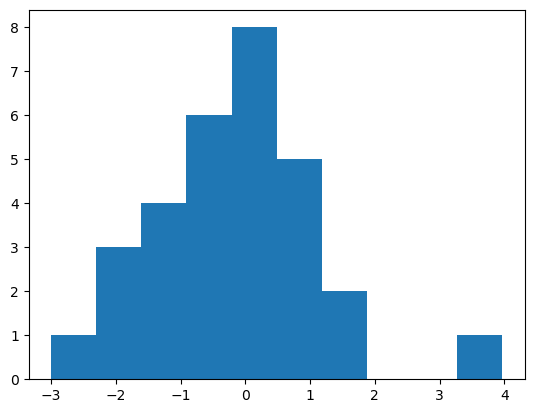

In [147]:
plt.hist(residuals)

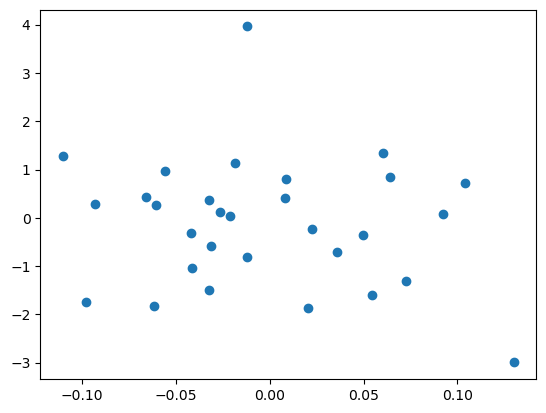

In [148]:
plt.scatter(fitted_values, residuals)

### Residuals Seem Approximately Normal

# Using this Model to Trade Stock

### Buying on all predicted increases results in a 4.11% loss

In [160]:
buy = fitted_values > 0
buy_day_changes = test_y[buy]
sum(buy_day_changes)

-4.105146935785797

### Buying on all predicted increases of at least 0.1% results in a 2.04% loss

In [174]:
buy = fitted_values >= 0.1
buy_day_changes = test_y[buy]
sum(buy_day_changes)

-2.04048675886901

### Buying on all predicted decreases of at least 0.1% results in a 1.84% loss


In [173]:
buy = fitted_values <= 0.1
buy_day_changes = test_y[buy]
sum(buy_day_changes)

-1.8370053089358935

## Verdict: This current model does not work well at all, let's try something else

# Predicting MSFT Open Change based On Its Previous Day

In [290]:
train_x, test_x, train_y, test_y = time_train_test_split(full_df[-365:], 7, "MSFT Prev Day Change", "MSFT Open % Change")
test_y.head()

Date
2023-07-27    0.802328
2023-07-28    0.891997
2023-07-31   -0.428520
2023-08-01   -0.217317
2023-08-02   -0.805730
Name: MSFT Open % Change, dtype: float64

In [291]:
model4 = sm.OLS(train_y, train_x).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     MSFT Open % Change   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.046
Date:                Thu, 17 Aug 2023   Prob (F-statistic):                       0.307
Time:                        13:50:26   Log-Likelihood:                         -585.68
No. Observations:                 358   AIC:                                      1173.
Df Residuals:                     357   BIC:                                      1177.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
MSFT Prev Day Change    -0.0400      0.039     -1.023      0.307      -0.117       0.037
==============================================================================
Omnibus:                       72.735   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1067.980
Skew:                           0.289   Prob(JB):                    1.23e-232
Kurtosis:                      11.442   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### No significance of the previous day's change on a day's open change

In [307]:
predictors = ["MSFT Prev Day Change", "AAPL Prev Day Change", "SPY Prev Day Change", "ORCL Prev Day Change", "ADBE Prev Day Change"]
train_x, test_x, train_y, test_y = time_train_test_split(full_df[-365:], 7, predictors, "MSFT Open % Change")
test_y.head()

Date
2023-07-27    0.802328
2023-07-28    0.891997
2023-07-31   -0.428520
2023-08-01   -0.217317
2023-08-02   -0.805730
Name: MSFT Open % Change, dtype: float64

In [306]:
model5 = sm.OLS(train_y, train_x).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      MSFT Day % Change   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.8674
Date:                Thu, 17 Aug 2023   Prob (F-statistic):                       0.503
Time:                        13:57:33   Log-Likelihood:                         -691.75
No. Observations:                 358   AIC:                                      1393.
Df Residuals:                     353   BIC:                                      1413.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
MSFT Prev Day Change    -0.0343      0.118     -0.291      0.771      -0.266       0.198
AAPL Prev Day Change     0.0861      0.108      0.795      0.427      -0.127       0.299
SPY Prev Day Change     -0.3323      0.206     -1.613      0.108      -0.738       0.073
ORCL Prev Day Change     0.0948      0.079      1.206      0.229      -0.060       0.249
ADBE Prev Day Change     0.0911      0.072      1.262      0.208      -0.051       0.233
==============================================================================
Omnibus:                       24.164   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.804
Skew:                           0.379   Prob(JB):                     4.16e-11
Kurtosis:                       4.622   Cond. No.                         8.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### No significance of any of the other asset's previous day's change on a MSFT day's open change